In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Data and Data Preparation

In [71]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [72]:
# checking for null values 
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

## Observation:

1000 null values can be observed in the _c39 column, basically the column is empty.

In [73]:
# checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

## Observation:

Total 40 columns.
2 float
17 integer
21 object

In [74]:
# looking at the value and the value counts of all the values present in the dataset
def values_of_columns():
    for i in df:
        print ("Column:",i,'\n',
              "No. of Unique Values:",df[i].nunique(),'\n',
              "Values:",df[i].value_counts(),'\n',
              '-'*50+'\n')
        
values_of_columns()

Column: months_as_customer 
 No. of Unique Values: 391 
 Values: 194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64 
 --------------------------------------------------

Column: age 
 No. of Unique Values: 46 
 Values: 43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64 
 --------------------------------------------------

Column: policy_number 
 No. of Unique Values: 1000 
 Values: 521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080  

In [75]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


## Observation:

* Months_as_customer: The maximum amount of months a customer stuck to this insurance was 479 months (40 years~) and the least is 0.
* Age: The youngest customer that claimed insurance is 19 y/o and the eldest being 64 y/o.
* total_claim_amount: The highest claim amount is 114,920 amd the lowest being 100.

## Data Visualization

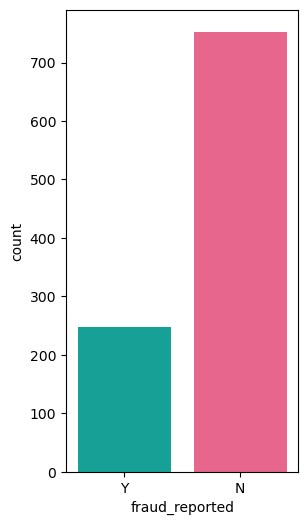

In [76]:
plt.figure(figsize=(3,6))
sns.countplot(x=df.fraud_reported,palette=('#00B8A9','#FC5185'))
plt.show()

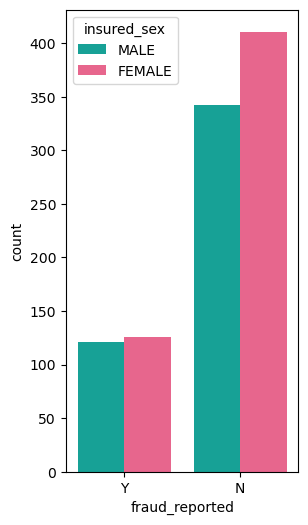

In [77]:
plt.figure(figsize=(3,6))
sns.countplot(x=df.fraud_reported,hue=df.insured_sex,palette=('#00B8A9','#FC5185'))
plt.show()

## Observation:

About 24.7% of the insurance claims are frauds.

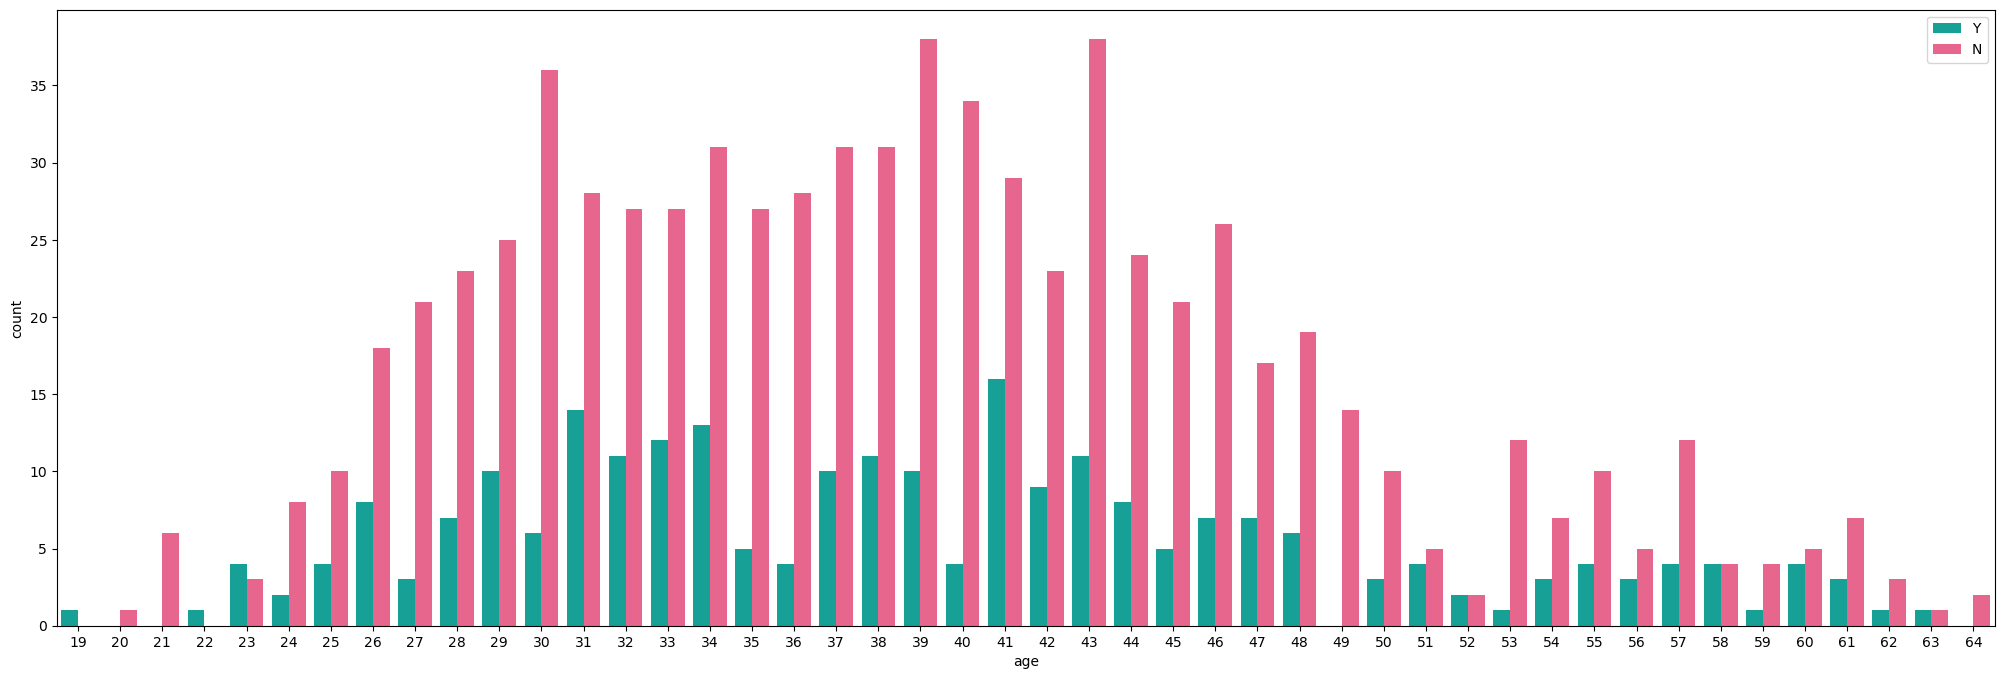

In [78]:
plt.figure(figsize=(25,8))
sns.countplot(x=df.age,hue=df.fraud_reported,palette=('#00B8A9','#FC5185'))
plt.legend(loc='upper right')
plt.show()

## Observation: 

Majority of the fraud claims are from customers aged between 30-43 y/o.

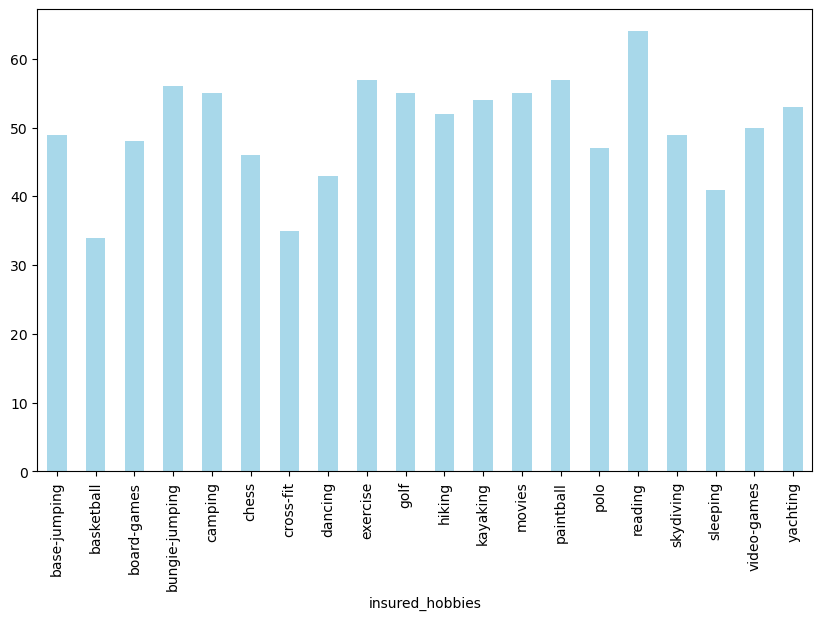

In [79]:
df.groupby('insured_hobbies').total_claim_amount.size().plot(kind='bar',figsize=(10,6),color='#A8D8EA')
plt.show()

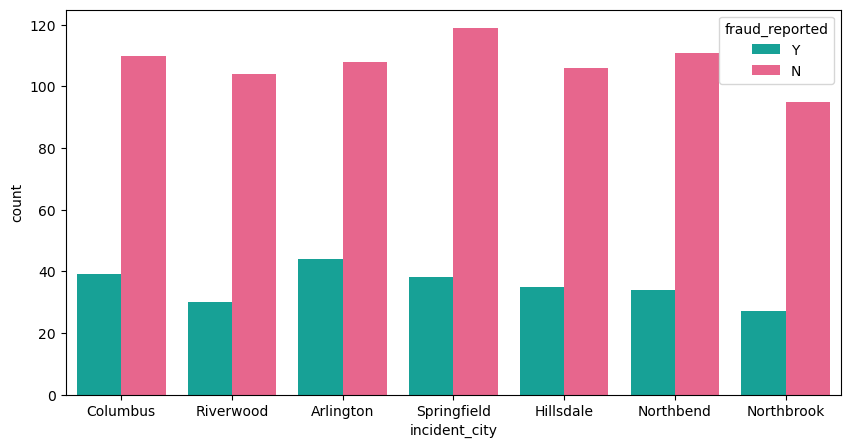

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.incident_city,hue=df.fraud_reported,palette=('#00B8A9','#FC5185'))
plt.show()

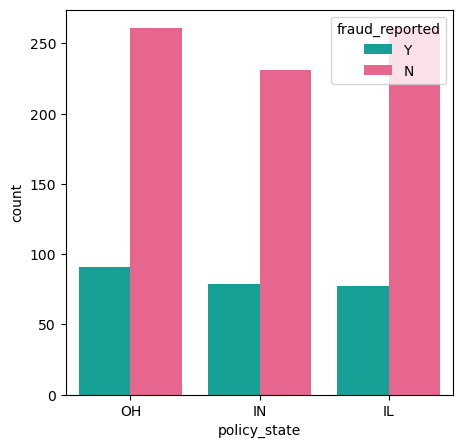

In [83]:
#Count Plot for comparision between "policy_state" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot(x =df["policy_state"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

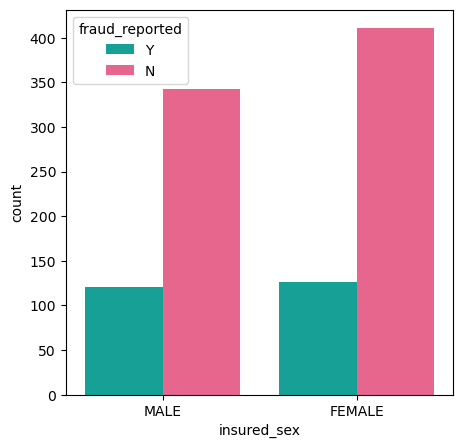

In [101]:
#Count Plot for comparision between "insured_sex" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot(x=df["insured_sex"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

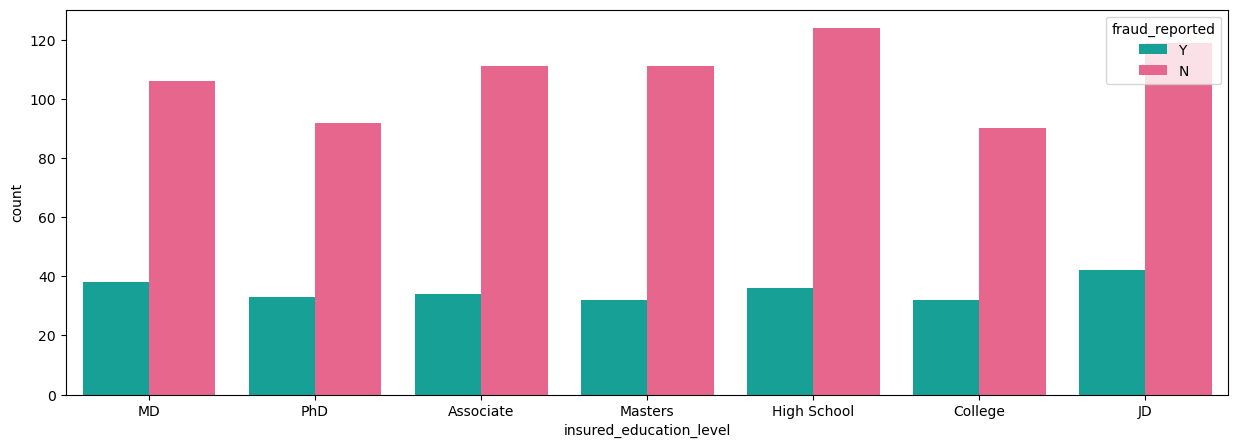

In [86]:
#Count Plot for comparision between "insured_education_level" column and "fraud_reported" column
plt.figure(figsize=(15,5))
sns.countplot(x=df["insured_education_level"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

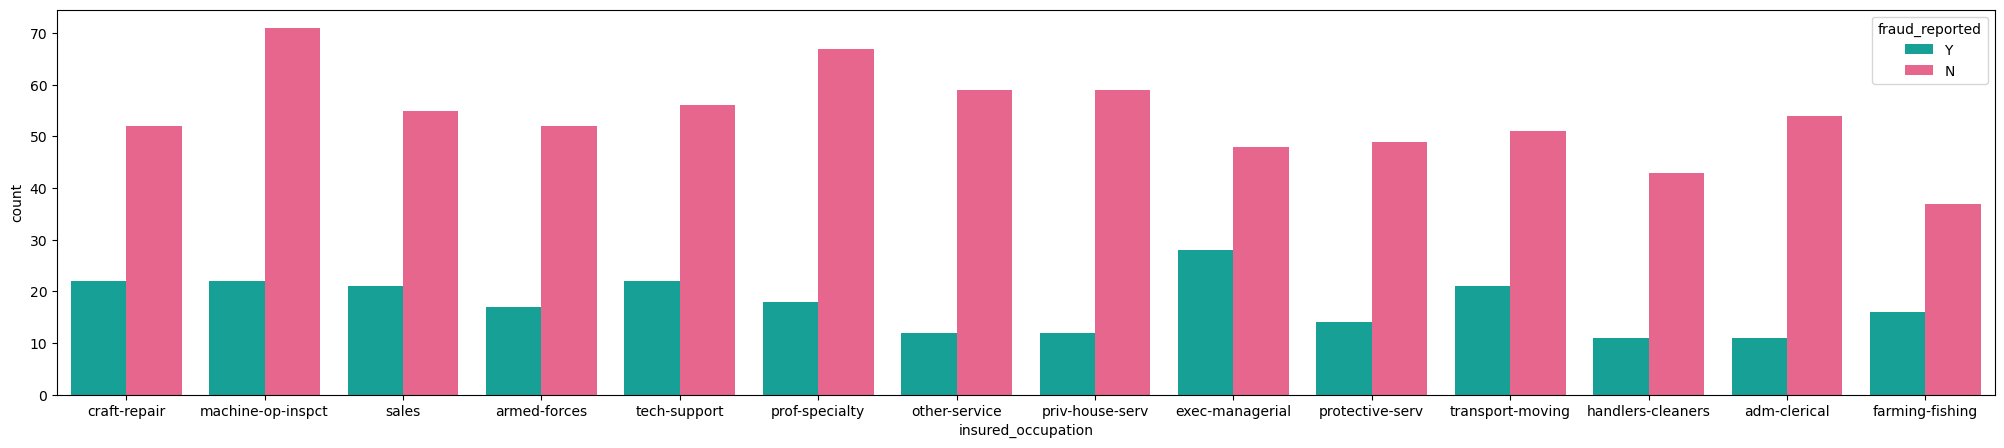

In [87]:
#Count Plot for comparision between "insured_occupation" column and "fraud_reported" column
plt.figure(figsize=(25,5))
sns.countplot(x=df["insured_occupation"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

## Observation:

* Highest fraud_reported is of exec-managerial
* Least fraud_reported is of handlers-cleaners

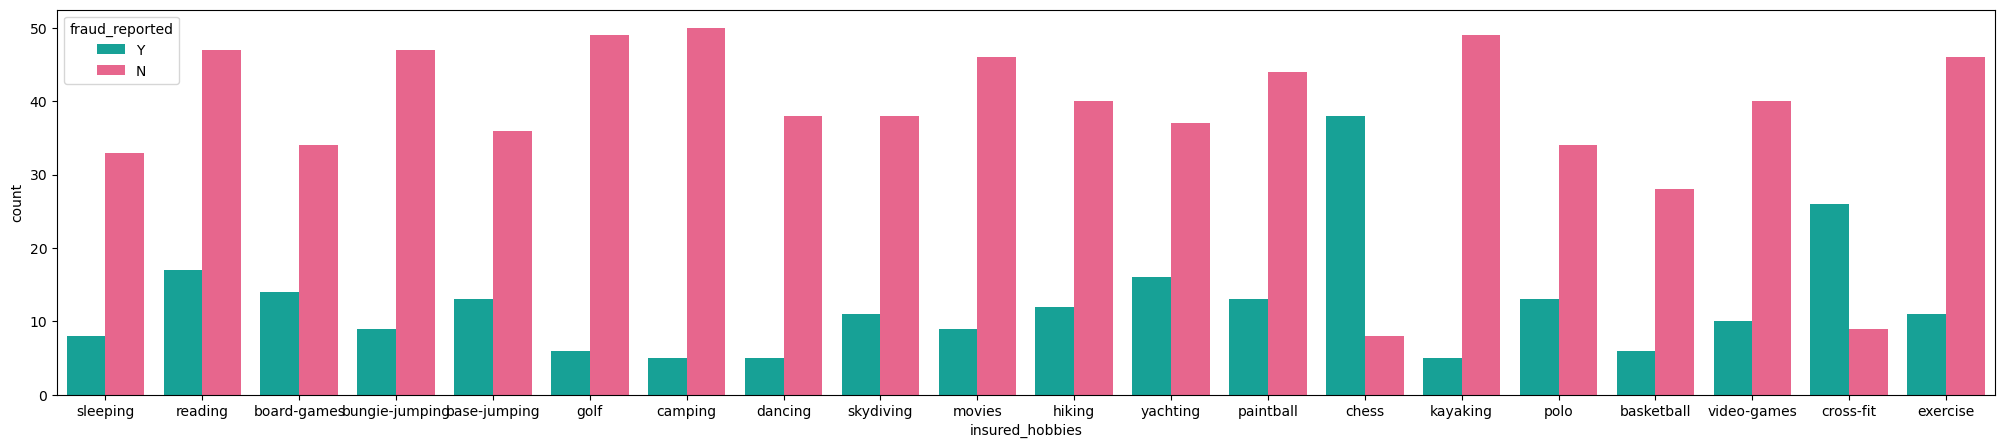

In [88]:
#Count Plot for comparision between "insured_hobbies" column and "fraud_reported" column
plt.figure(figsize=(25,5))
sns.countplot(x=df["insured_hobbies"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

## Observation:

fraud_reported in chess and cross-fit is really high compared to the other hobbies.

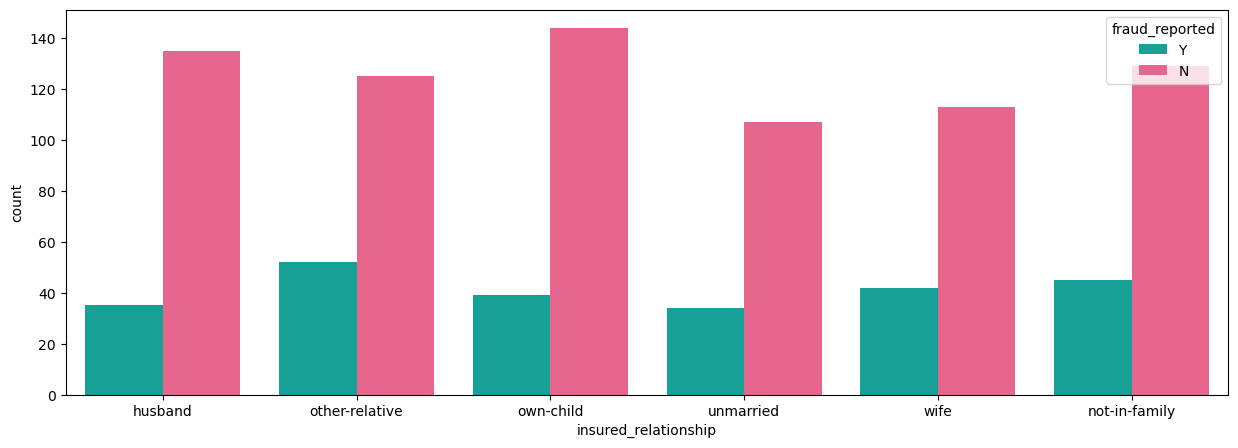

In [89]:
#Count Plot for comparision between "insured_relationship" column and "fraud_reported" column
plt.figure(figsize=(15,5))
sns.countplot(x=df["insured_relationship"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

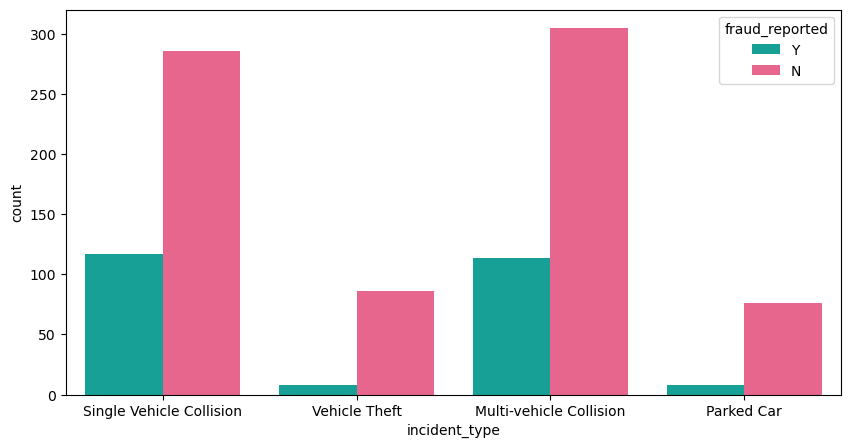

In [90]:
#Count Plot for comparision between "incident_type" column and "fraud_reported" column
plt.figure(figsize=(10,5))
sns.countplot(x=df["incident_type"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

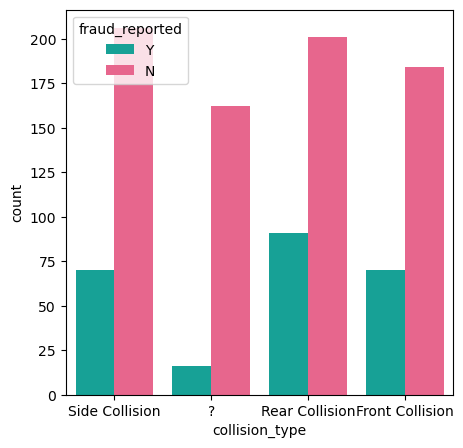

In [91]:
#Count Plot for comparision between "collision_type" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot(x=df["collision_type"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

## Observation:

Rear Collision has the highest fraud_reported compared to other collision_type

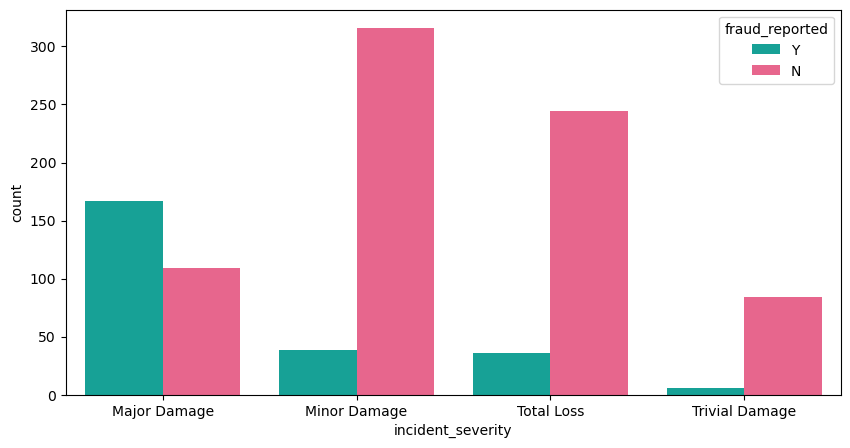

In [92]:
#Count Plot for comparision between "incident_severity" column and "fraud_reported" column
plt.figure(figsize=(10,5))
sns.countplot(x= df["incident_severity"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

## Observation:

When it comes to incident_severity we can see that Major Damage has higher reports of frauds

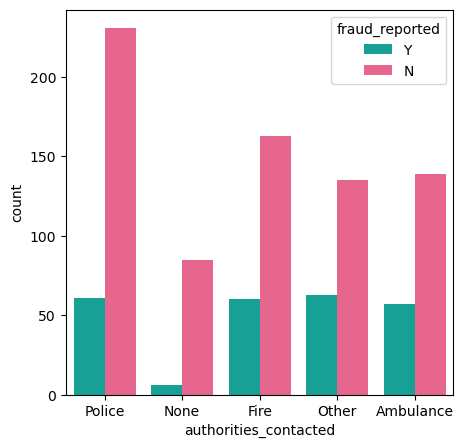

In [93]:
#Count Plot for comparision between "authorities_contacted" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot(x=df["authorities_contacted"] , hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

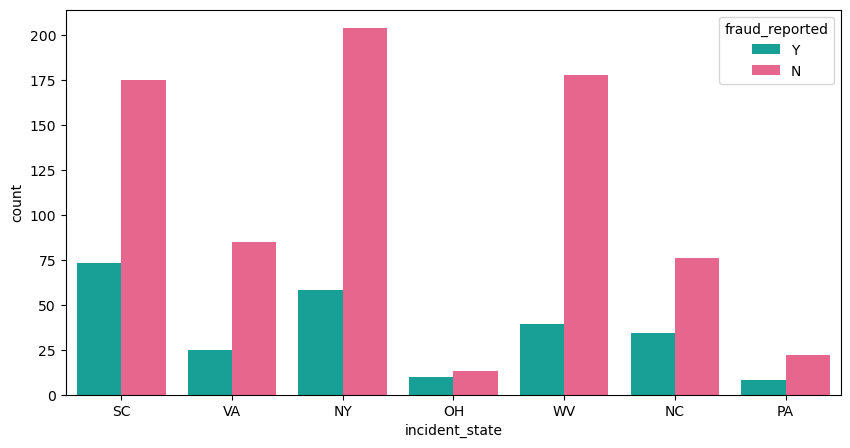

In [94]:
#Count Plot for comparision between "incident_state" column and "fraud_reported" column
plt.figure(figsize=(10,5))
sns.countplot(x=df["incident_state"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

## Observation: 

the highest frauds reproted are from the SC state

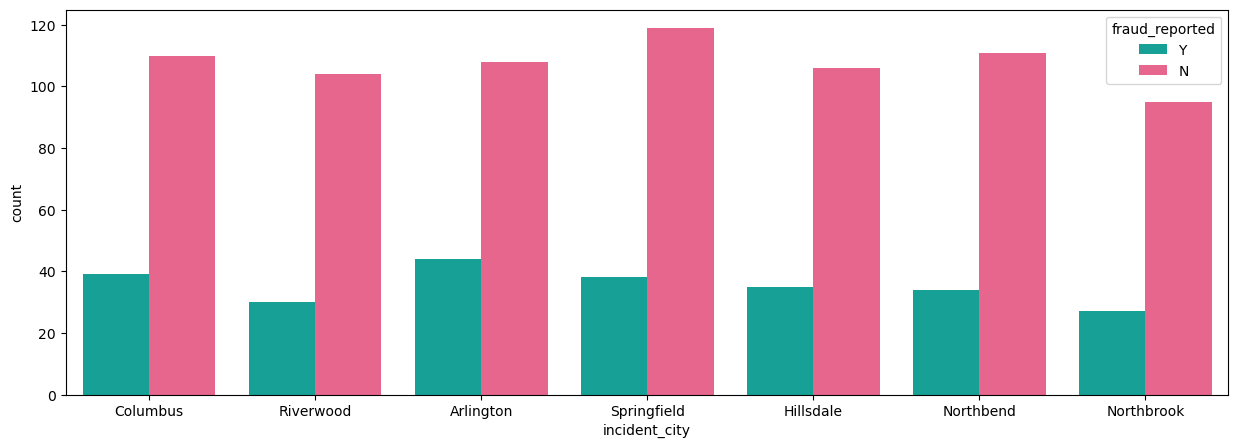

In [95]:
#Count Plot for comparision between "incident_city" column and "fraud_reported" column
plt.figure(figsize=(15,5))
sns.countplot(x=df["incident_city"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

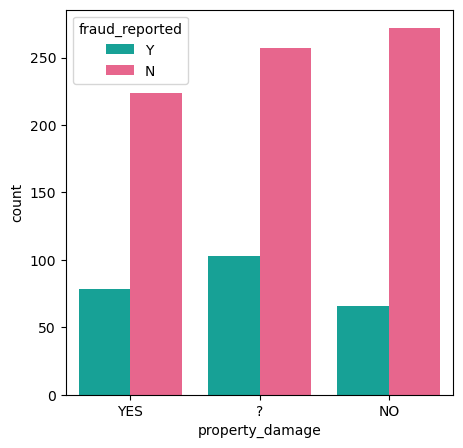

In [96]:
#Count Plot for comparision between "property_damage" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot(x=df["property_damage"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

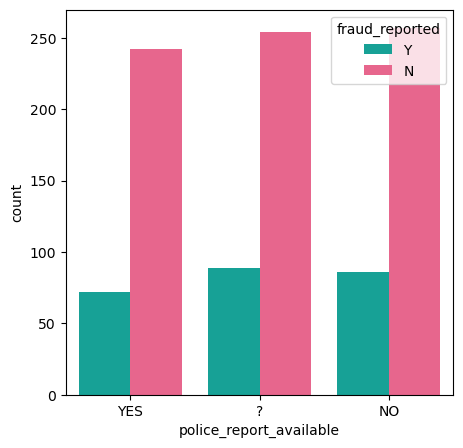

In [97]:
#Count Plot for comparision between "police_report_available" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot(x=df["police_report_available"] , hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

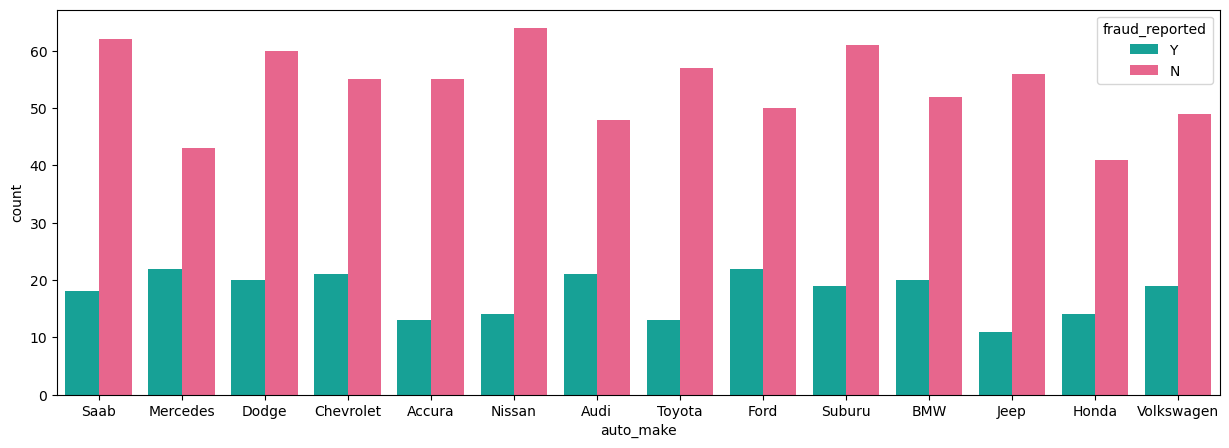

In [98]:
#Count Plot for comparision between "auto_make" column and "fraud_reported" column
plt.figure(figsize=(15,5))
sns.countplot(x=df["auto_make"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

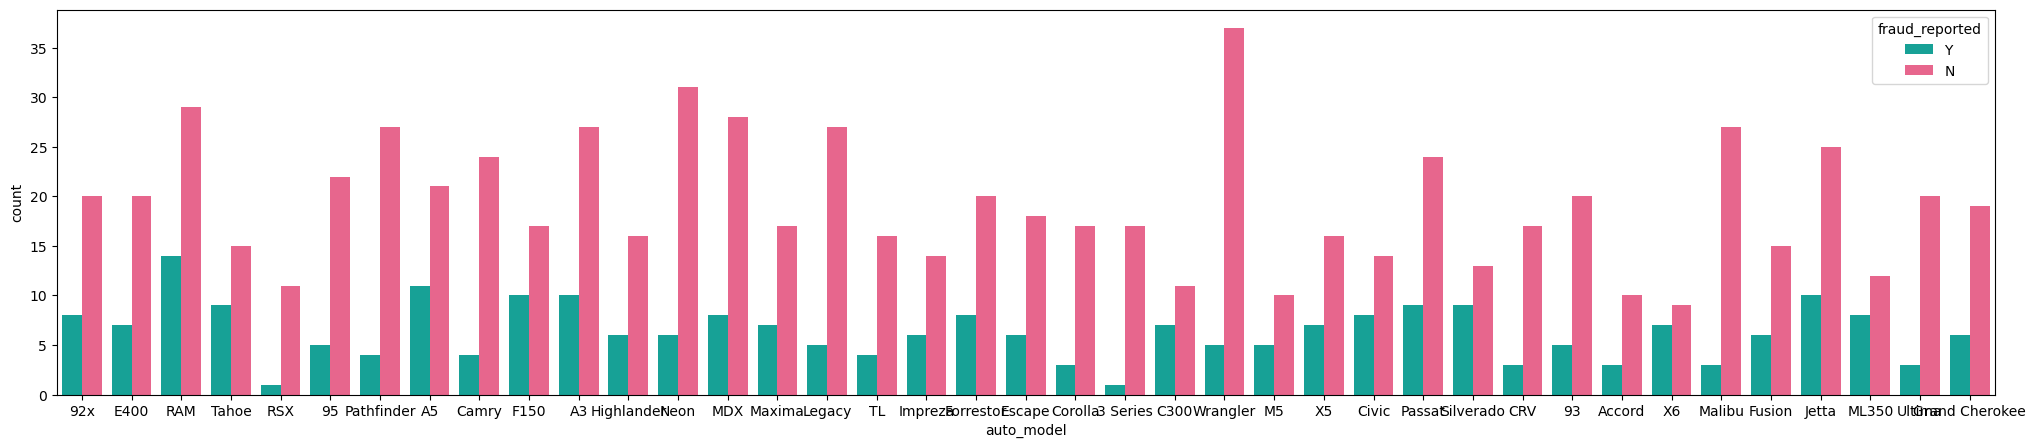

In [99]:
#Count Plot for comparision between "auto_model" column and "fraud_reported" column
plt.figure(figsize=(25,5))
sns.countplot(x=df["auto_model"], hue=df['fraud_reported'],palette=('#00B8A9','#FC5185'))
plt.show()

# Feature Engineering and Preprocessing


In [100]:
# incident_hour_of_the_day → categorizing the hour of the day to lower the number of unique values present in the columns
timeperiod_categorized = []
for values in df.incident_hour_of_the_day:
    if values <= 6: timeperiod_categorized.append('early morning')
    elif values <= 11: timeperiod_categorized.append('morning')
    elif values <= 16: timeperiod_categorized.append('afternoon')
    elif values <= 19: timeperiod_categorized.append('evening')
    else: timeperiod_categorized.append('night')
df['time_period'] = timeperiod_categorized

# replacing the "?" values with null values
df = df.replace({'?': np.nan})

#dropping _c39 because it contains null values (empty column)
df = df.drop("_c39", axis=1)

# replacing null values with mode
df["collision_type"] = df["collision_type"].fillna(df["collision_type"].mode())
df["property_damage"] = df["property_damage"].fillna(df["property_damage"].mode())
df["police_report_available"] = df["police_report_available"].fillna(df["police_report_available"].mode())
df['umbrella_limit'] = df['umbrella_limit'].replace(0, df['umbrella_limit'].mean())
df['capital-gains'] = df['capital-gains'].replace(0, df['capital-gains'].mean())
df['capital-loss'] = df['capital-loss'].replace(0, df['capital-loss'].mean())  
df['injury_claim'] = df['injury_claim'].replace(0, df['injury_claim'].mean())
df['property_claim'] = df['property_claim'].replace(0, df['property_claim'].mean())

#incident_date; seperating dates into different columns
df['incident_date']=pd.to_datetime(df['incident_date'])
df['Incident_Month'] = df['incident_date'].apply(lambda m:m.month)
df = df.drop('incident_date',axis=1)

#dropping columns that are not necessary
df = df.drop(df[['policy_number','insured_zip','incident_location','policy_bind_date']],axis=1)

# splitting policy_csl into csl_per_person and csl_per_accident
df['csl_per_person'] = df.policy_csl.str.split('/',expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/',expand=True)[1]
df = df.drop('policy_csl',axis=1)

# Outliers, VIF, Skewness and Correlation


In [32]:
# label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == "O":
        df[i] = le.fit_transform(df[i].values)

In [33]:
num_features = []
for i in df:
    if df[i].dtypes!='O': num_features.append(i)

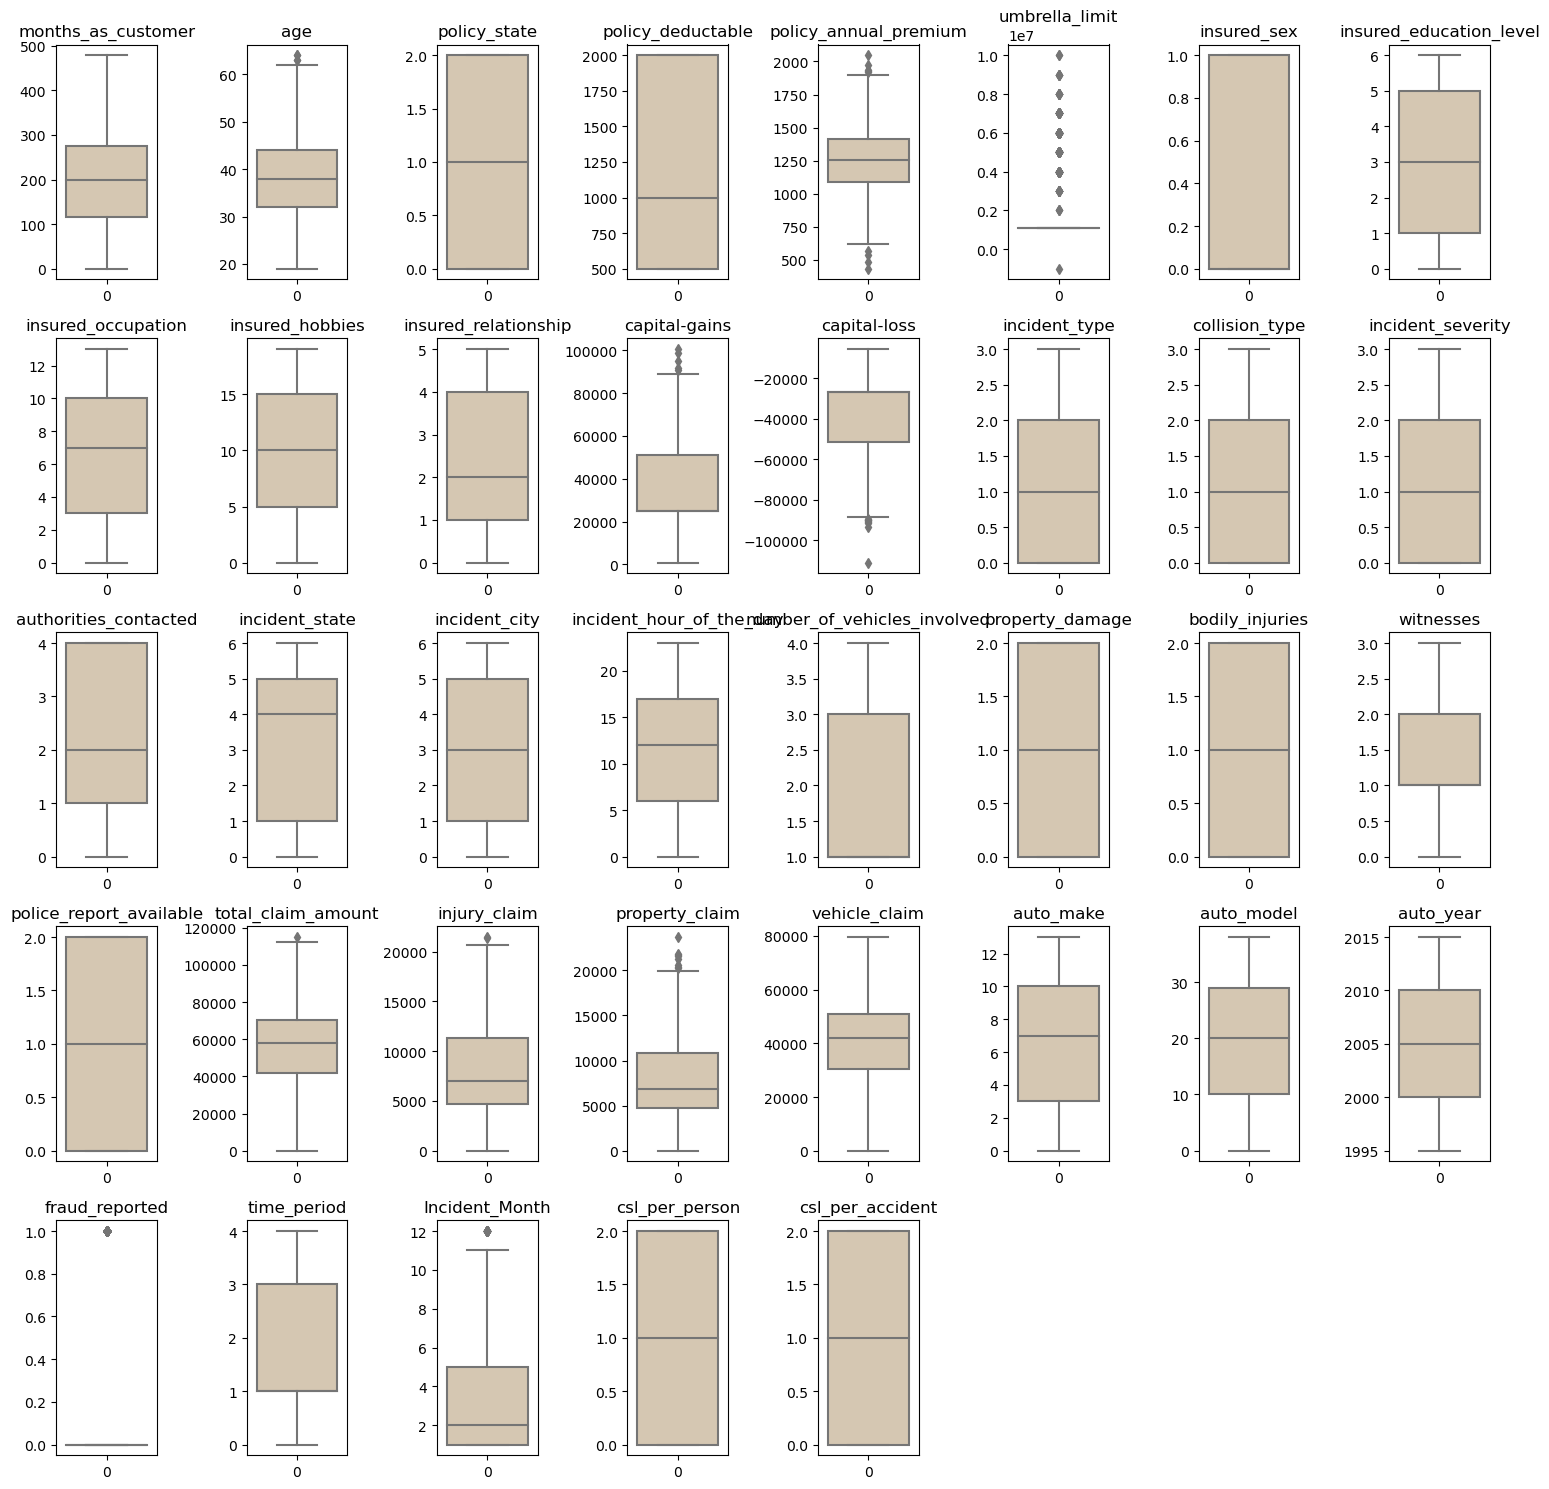

In [34]:
#outliers
collist = df[num_features].columns.values
nrows = 5
ncols = 8

plt.figure(figsize=(15,15))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df[collist[i]],orient='v',palette=['#DBC8AC'])
    plt.title(collist[i])
    plt.tight_layout()

## Observation:

The following columns have outliers
* age
* policy_annual_premium
* umbrella_limit
* property_claim
* total_claim_amount
* fraud_reported
* incident_month
* injury_claim
* capital_gains
* capital_loss

In [35]:
#using zscore to remove outliers
from scipy.stats import zscore
collist = df[['age', 'policy_annual_premium', 'umbrella_limit','capital-gains','capital-loss','total_claim_amount',
              'injury_claim', 'property_claim','Incident_Month']]
z = np.abs(zscore(collist))

# Creating new dataframe
df_new = df[(z<3).all(axis=1)]
df_new.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,time_period,Incident_Month,csl_per_person,csl_per_accident
0,328,48,2,1000,1406.91,1101000,1,4,2,17,...,13020.0,52080,10,1,2004,1,1,1,1,2
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,780.0,3510,8,12,2007,1,3,1,1,2
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,3850.0,23100,4,30,2007,0,3,2,0,1
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,6340.0,50720,3,34,2014,1,1,10,1,2
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,650.0,4550,0,31,2009,0,4,2,2,0


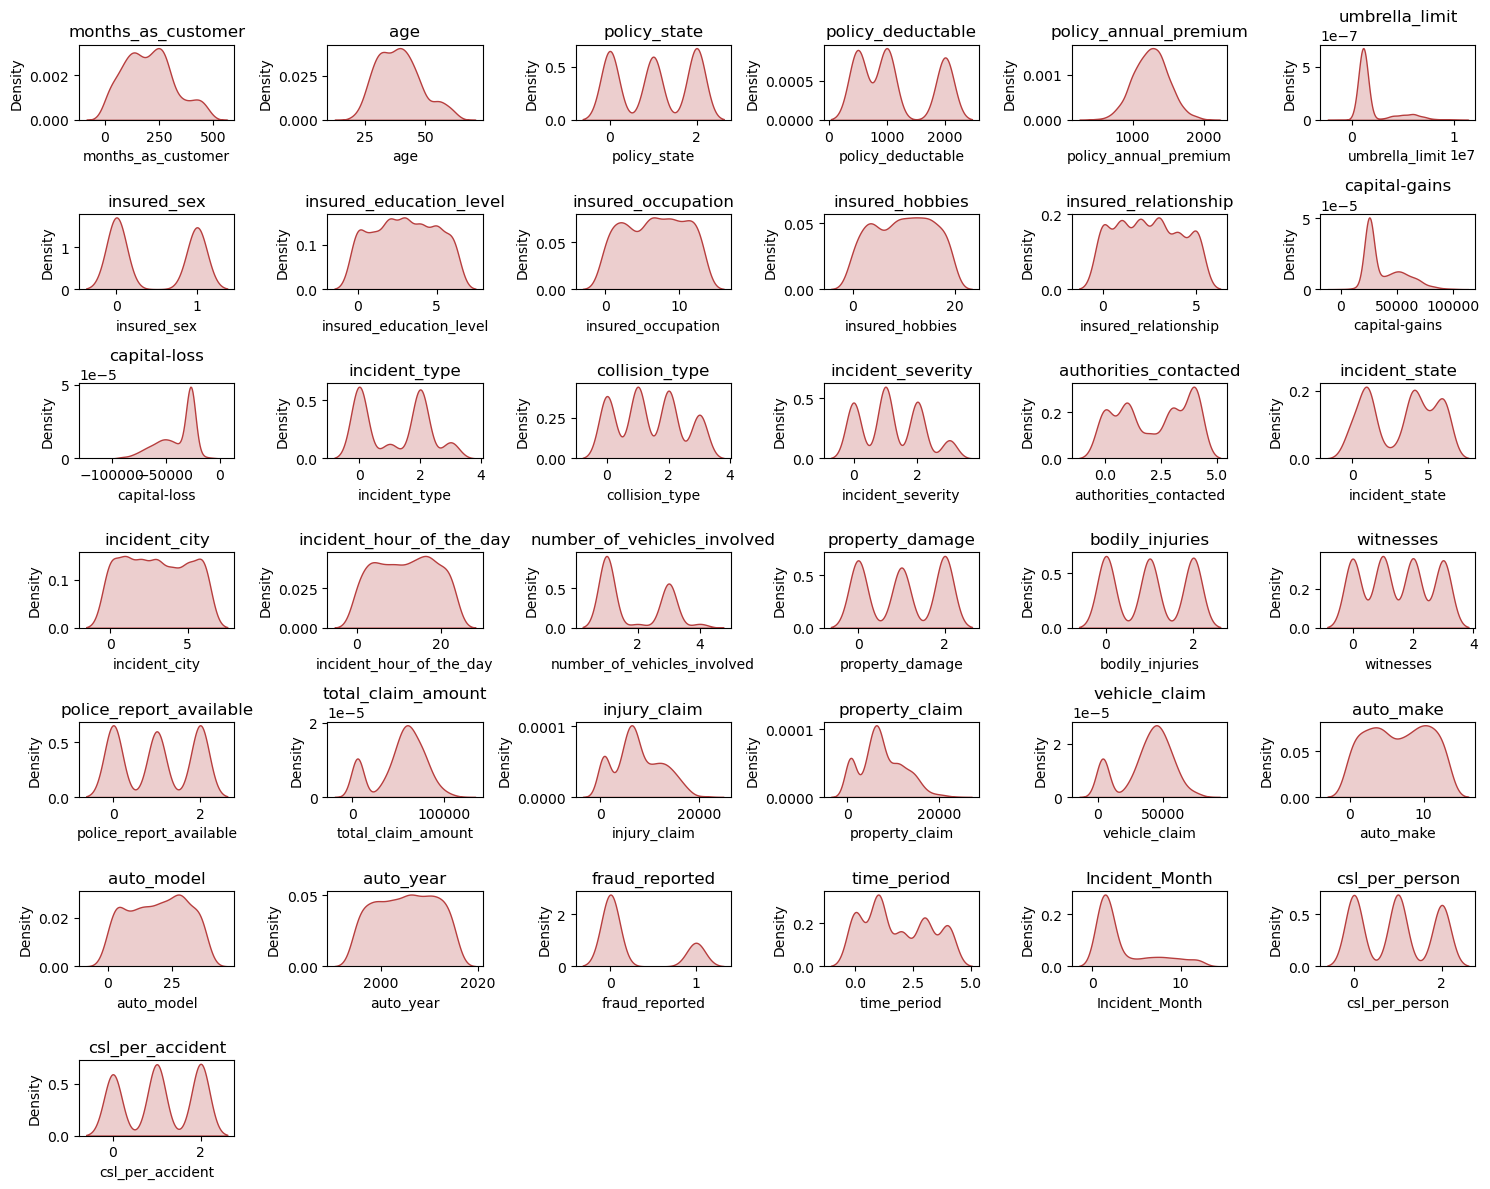

In [36]:
# skewness
collist = df[num_features].columns.values
nrows = 7
ncols = 6

plt.figure(figsize=(15,12))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.kdeplot(data=df[collist[i]],color='#B73E3E',fill=1)
    plt.title(collist[i])
    plt.tight_layout()

In [37]:
#applying power transform to reduce the skewness of the columns
from sklearn.preprocessing import power_transform
collist=['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
         'number_of_vehicles_involved', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
         'Incident_Month']
df_new[collist] = power_transform(df_new[collist],method='yeo-johnson')
df_new[collist]

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,total_claim_amount,injury_claim,property_claim,vehicle_claim,Incident_Month
0,1.041996,1.000805,0.063749,-0.449266,1.032816,0.752287,-0.836244,0.722144,-0.092989,1.120326,0.759575,-1.103235
1,0.298095,0.426980,1.273647,1.818253,-0.754778,0.752287,-0.836244,-1.775394,-1.641224,-1.649355,-1.784536,-1.103235
2,-0.515153,-1.133360,1.273647,1.818253,0.028319,0.752287,1.201438,-0.711033,0.145358,-0.679337,-0.814721,-0.019972
3,0.516118,0.324046,1.273647,2.371309,0.823241,-1.353674,-0.836244,0.397987,-0.128244,-0.107227,0.683595,1.560775
4,0.298095,0.626232,0.063749,2.371309,1.558121,-0.633846,-0.836244,-1.727850,-1.435839,-1.709177,-1.737543,-0.019972
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.290154,0.000732,0.063749,-0.449266,-0.754778,0.752287,-0.836244,1.344673,1.761313,0.367243,1.264116,-0.019972
996,0.733396,0.324046,0.063749,-0.449266,1.735901,0.752287,-0.836244,2.206885,1.854188,1.899631,1.908056,-1.103235
997,-0.553534,-0.469015,-1.216422,0.684676,0.028319,0.752287,1.201438,0.559524,0.106257,0.130741,0.783073,-1.103235
998,1.899600,2.116517,1.273647,1.818253,-0.754778,0.752287,-0.836244,-0.241131,-0.369478,-0.352242,-0.097610,-0.019972


In [38]:
df_new.skew()

months_as_customer            -0.134939
age                           -0.002106
policy_state                  -0.044333
policy_deductable              0.022243
policy_annual_premium          0.044323
umbrella_limit                 1.597850
insured_sex                    0.136610
insured_education_level        0.011899
insured_occupation            -0.063436
insured_hobbies               -0.063716
insured_relationship           0.069920
capital-gains                  0.031710
capital-loss                   0.016884
incident_type                  0.085481
collision_type                 0.129939
incident_severity              0.271101
authorities_contacted         -0.116543
incident_state                -0.141274
incident_city                  0.039395
incident_hour_of_the_day      -0.043900
number_of_vehicles_involved    0.379938
property_damage               -0.046410
bodily_injuries                0.001897
witnesses                      0.023900
police_report_available        0.011509


### High Skewed columns

* umbrella_limit                 1.890782
* Incident_Month                 1.400103
* fraud_reported                 1.191867
* capital-gains                  0.943831
* capital-loss                  -0.932941

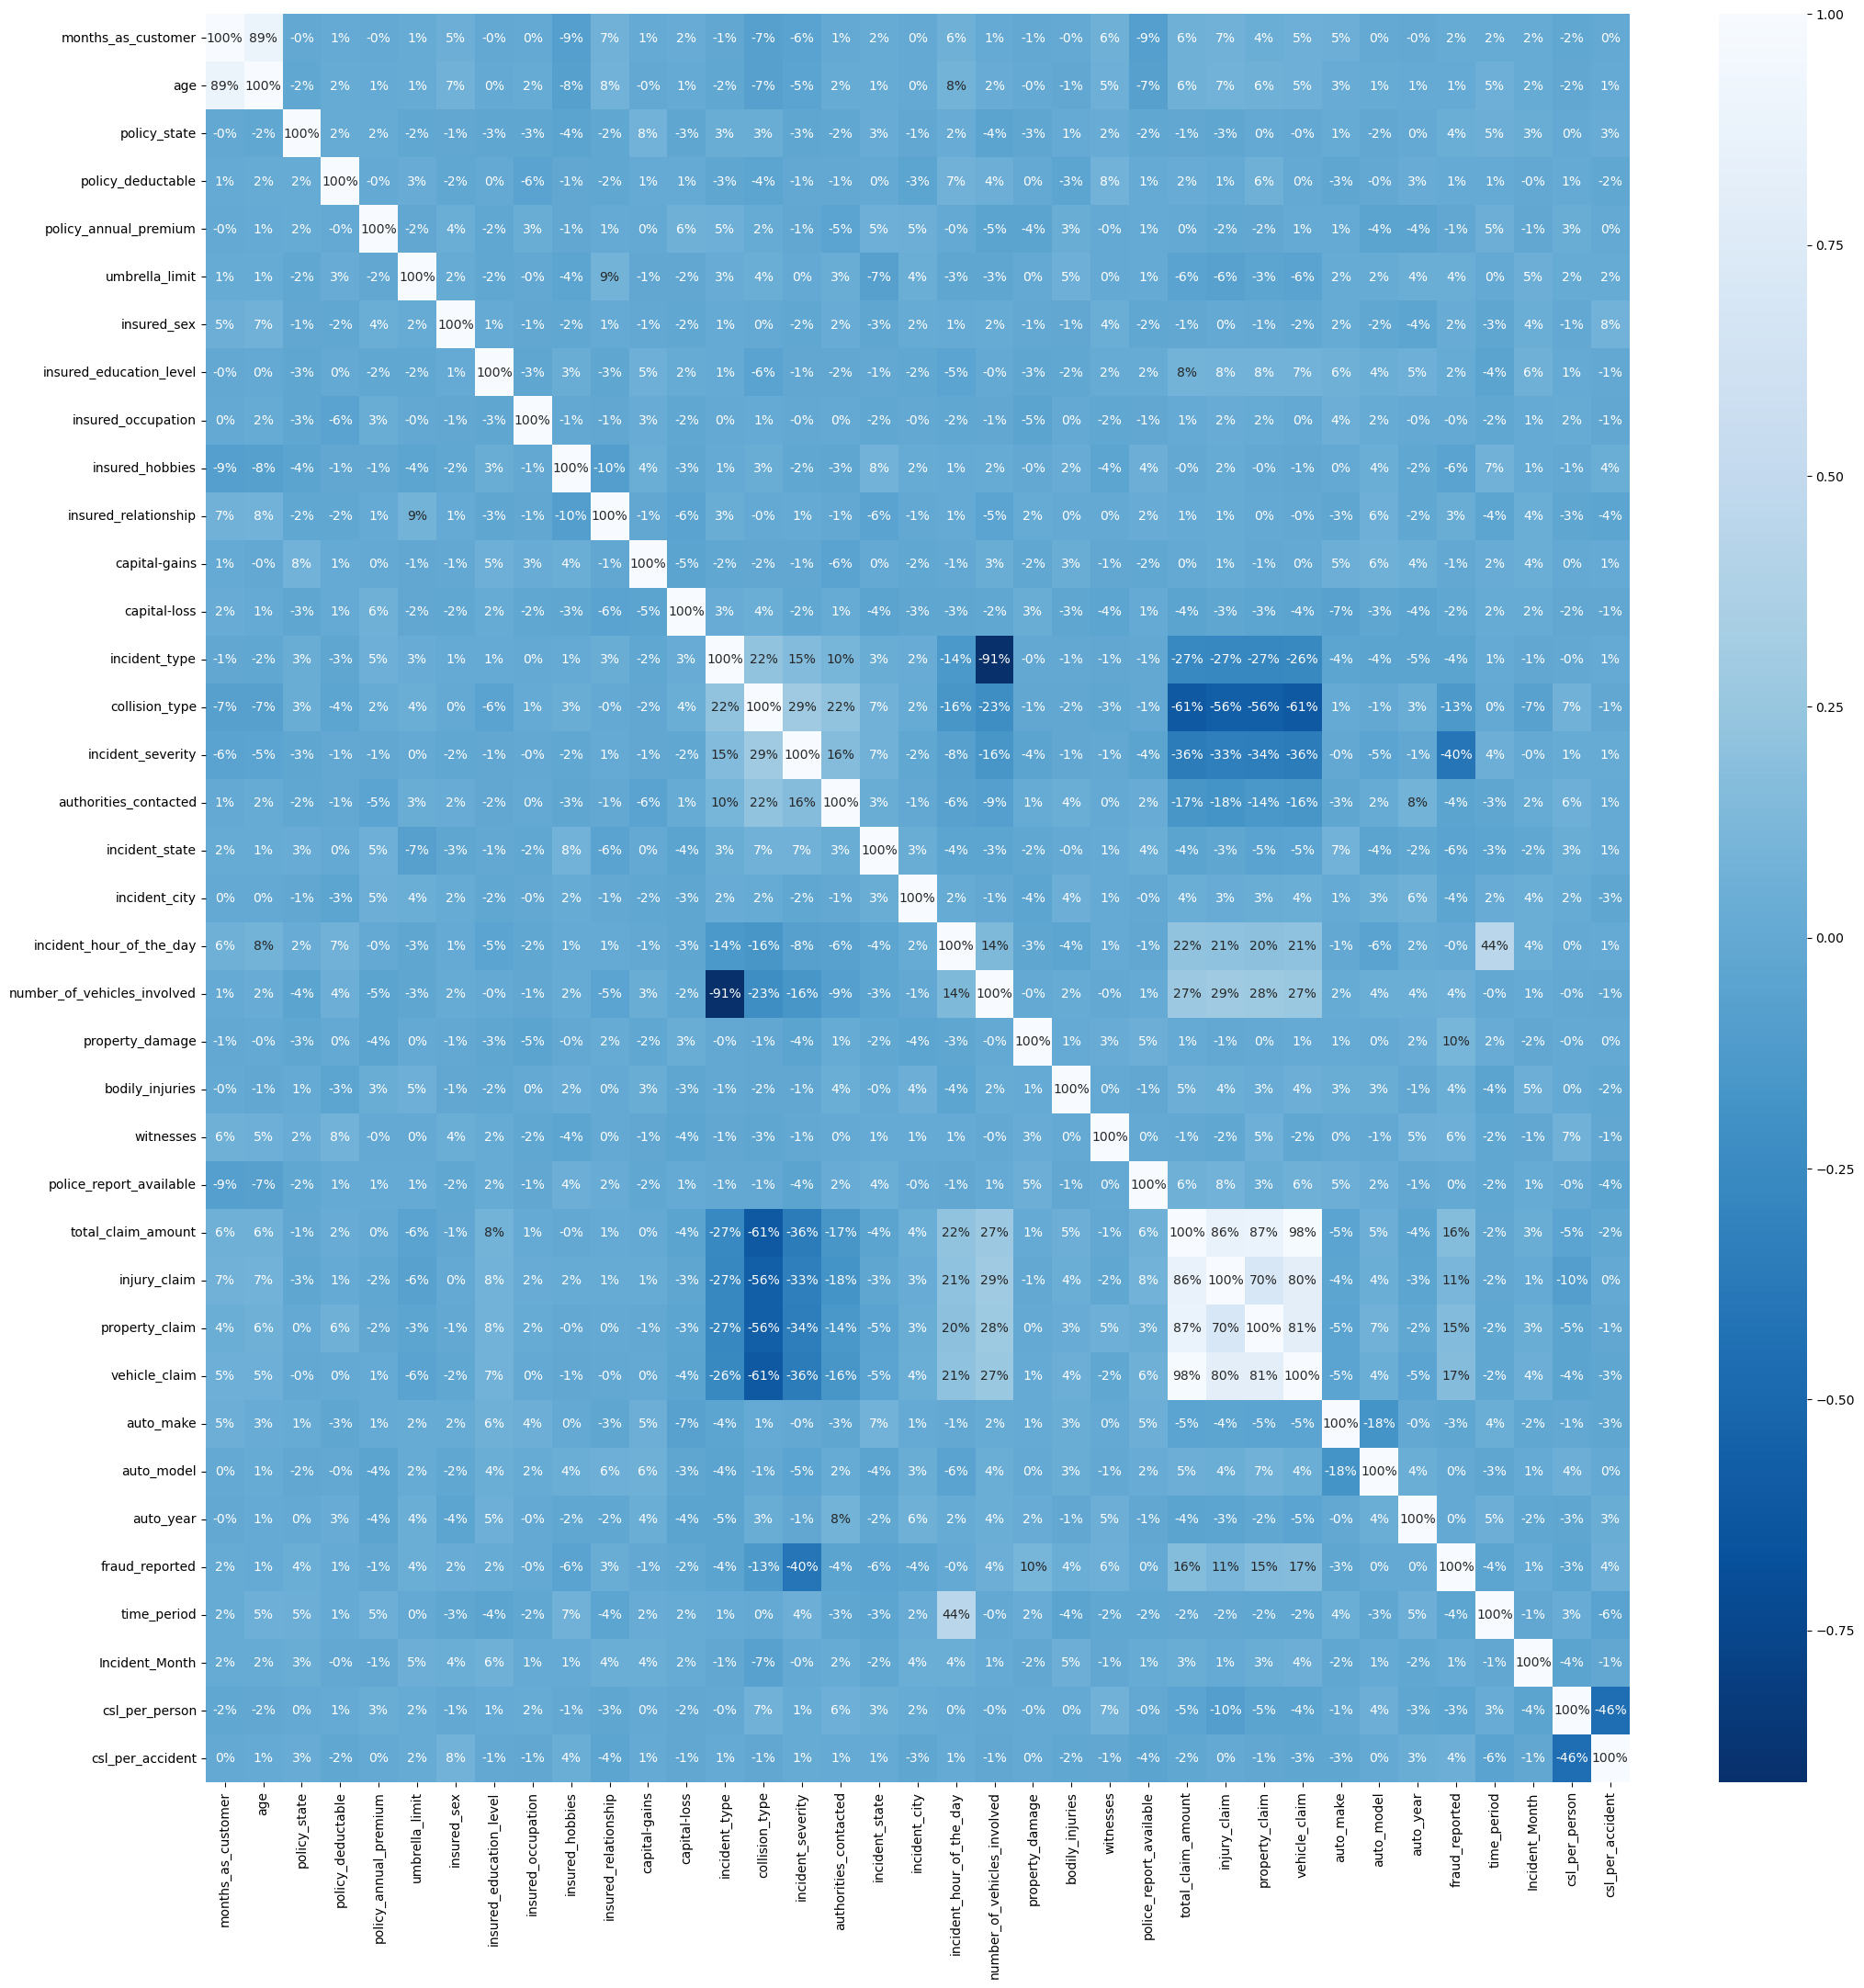

In [39]:
plt.figure(figsize=(25,25))
sns.heatmap(df_new.corr(), annot=True, fmt='.0%',cmap='Blues_r')
plt.show()

## Observation:

injury claim, property claim and vehicle claim seem to have high correlation with total claim amount. That is obvious since the total claim amount is the sum of the three.

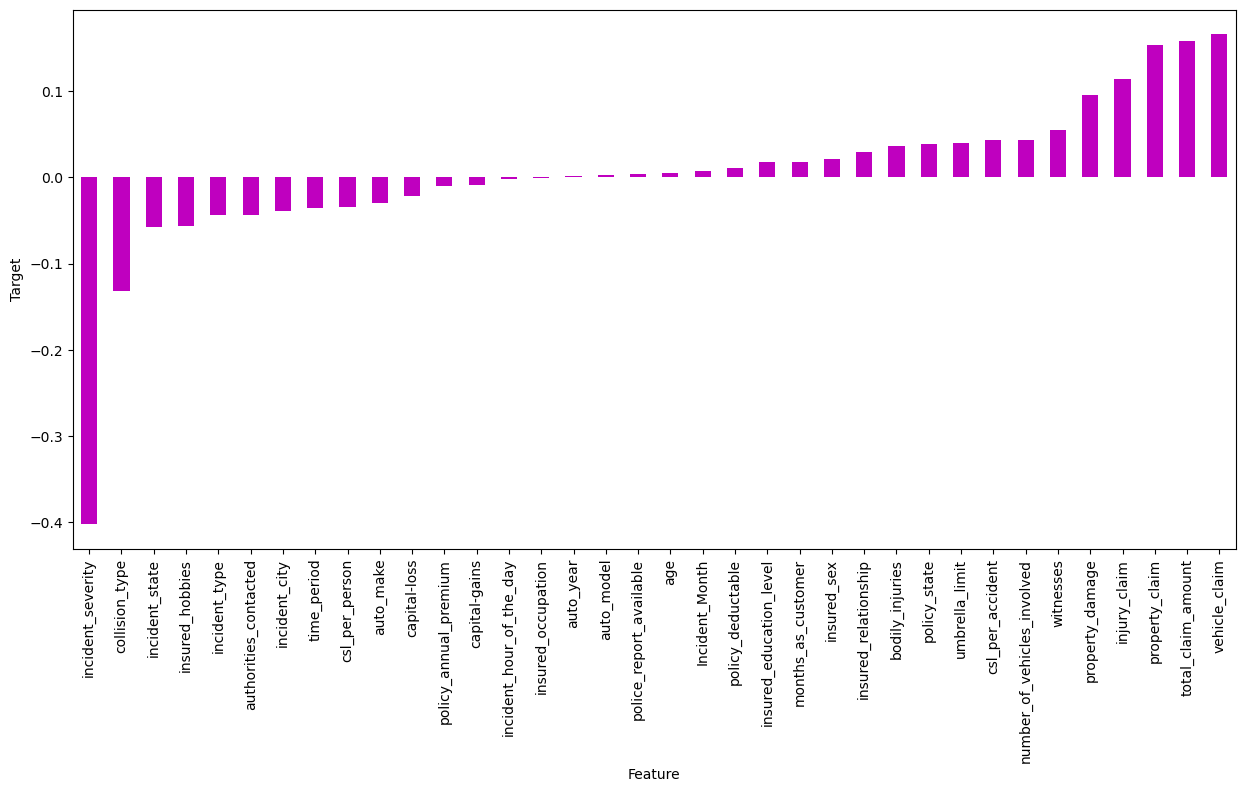

In [40]:
plt.figure(figsize=(15,7))
df_new.corr()['fraud_reported'].sort_values(ascending=True).drop(['fraud_reported']).plot(kind='bar',color='m')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [41]:
#dropping insured_occuptaion since it has no correlation with the target
df = df.drop('insured_occupation',axis=1)

## Splitting into x & y

In [42]:
x=df_new.drop("fraud_reported",axis=1)
y=df_new["fraud_reported"]

In [44]:
from imblearn.over_sampling import SMOTE
x, y = SMOTE().fit_resample(x,y)

In [45]:
from sklearn.preprocessing import StandardScaler
x = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF_factor']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Columns'] = x.columns
vif[vif['VIF_factor']>10]

,VIF_factor,Columns
25,143.969054,total_claim_amount
28,71.063141,vehicle_claim


In [47]:
# dopping total_claim_amount due to it's high VIF factor
x = x.drop('total_claim_amount',axis=1)

## Model Selection

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [49]:
#scaling the training data
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)

In [50]:
# making a function for roc_auc score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test,y_pred):
    y_test_new = LabelBinarizer().fit_transform(y_test)
    y_pred_new = LabelBinarizer().fit_transform(y_pred)
    return round(roc_auc_score(y_test_new,y_pred_new)*100,2)

In [51]:
# making a function for classification models
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

Model, score, f1, cross, roc_auc = [], [], [], [], []

def classification_model(model):
    Model.append(str(model).split("(")[0])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    scoree = round(accuracy_score(y_test,y_pred)*100,2)
    score.append(scoree)
    
    f1_s = round(f1_score(y_test,y_pred,average='micro')*100,2)
    f1.append(f1_s)
    
    cross_v = round(cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()*100,2)
    cross.append(cross_v)
    
    roc_ = multiclass_roc_auc_score(y_test,y_pred)
    roc_auc.append(roc_)
    
    print ("Model:",str(model).split("(")[0])
    print ("Accuracy Score:",scoree)
    print ("f1 Score:",f1_s)
    print ("CV Score:",cross_v)
    print ("ROC_AUC Score:",roc_)

#      shows the classification report
    class_report = classification_report(y_test,model.predict(x_test))
    print (class_report)
    
    
#     shows the confusion matrix
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,square=True)

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_para = {'penalty':['l1','l2','elasticnet','none'],'C':range(1,10)}
gs_lr = GridSearchCV(lr,lr_para,cv=3,scoring='accuracy')
gs_lr.fit(x_train,y_train)
gs_lr.best_params_

{'C': 1, 'penalty': 'l2'}

Model: LogisticRegression
Accuracy Score: 81.47
f1 Score: 81.47
CV Score: 80.1
ROC_AUC Score: 81.51
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       186
           1       0.79      0.85      0.82       181

    accuracy                           0.81       367
   macro avg       0.82      0.82      0.81       367
weighted avg       0.82      0.81      0.81       367



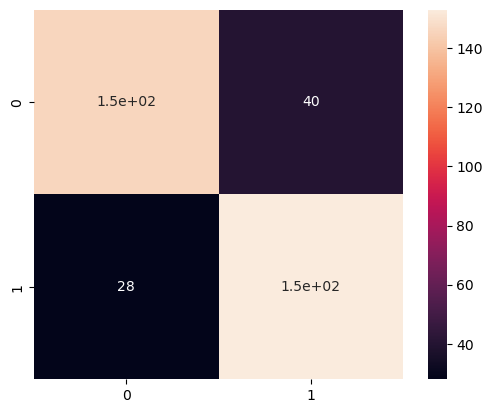

In [53]:
lr = LogisticRegression(penalty='l2',C=1)
classification_model(lr) 

In [54]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
gsCV_dtc = GridSearchCV(dtc,dtc_para,cv=10,scoring='accuracy')
gsCV_dtc.fit(x_train,y_train)
gsCV_dtc.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

Model: DecisionTreeClassifier
Accuracy Score: 85.83
f1 Score: 85.83
CV Score: 84.05
ROC_AUC Score: 85.83
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       186
           1       0.86      0.86      0.86       181

    accuracy                           0.86       367
   macro avg       0.86      0.86      0.86       367
weighted avg       0.86      0.86      0.86       367



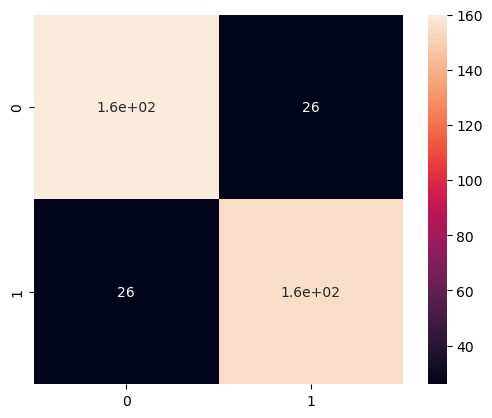

In [55]:
dtc = DecisionTreeClassifier(criterion='log_loss',splitter='best')
classification_model(dtc)

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_para = {'n_estimators':range(50,250,50),'criterion':['gini','entropy']}
gsCV_rfc = GridSearchCV(rfc,rfc_para,cv=3,scoring='accuracy')
gsCV_rfc.fit(x_train,y_train)
gsCV_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 150}

Model: RandomForestClassifier
Accuracy Score: 89.1
f1 Score: 89.1
CV Score: 87.53
ROC_AUC Score: 89.14
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       186
           1       0.87      0.92      0.89       181

    accuracy                           0.89       367
   macro avg       0.89      0.89      0.89       367
weighted avg       0.89      0.89      0.89       367



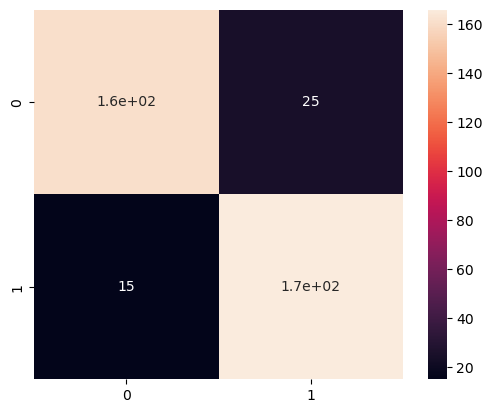

In [57]:
rfc = RandomForestClassifier(n_estimators=200,criterion='gini')
classification_model(rfc)

In [58]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_para = {'n_estimators':range(50,300,50),'algorithm':['SAMME','SAMME.R']}
gs_abc = GridSearchCV(abc,abc_para,cv=3,scoring='accuracy')
gs_abc.fit(x_train,y_train)
gs_abc.best_params_

{'algorithm': 'SAMME', 'n_estimators': 200}

Model: AdaBoostClassifier
Accuracy Score: 80.93
f1 Score: 80.93
CV Score: 86.44
ROC_AUC Score: 81.06
              precision    recall  f1-score   support

           0       0.89      0.72      0.79       186
           1       0.76      0.91      0.82       181

    accuracy                           0.81       367
   macro avg       0.82      0.81      0.81       367
weighted avg       0.82      0.81      0.81       367



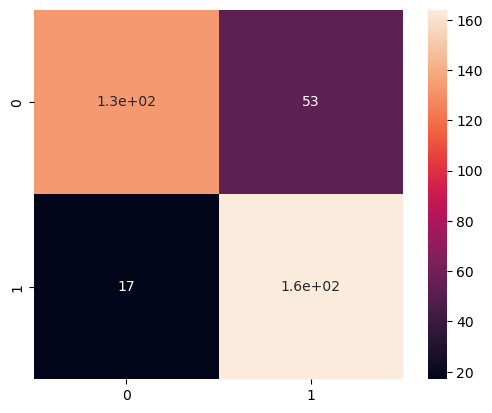

In [59]:
ada = AdaBoostClassifier(n_estimators=150,algorithm='SAMME')
classification_model(ada) 

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc_para = {'n_estimators':range(50,300,50),'loss':['log_loss','deviance','exponential'],
            'criterion':['friedman_mse','squared_error','mse']}
gs_gbc = GridSearchCV(gbc,gbc_para,cv=3,scoring='accuracy')
gs_gbc.fit(x_train,y_train)
gs_gbc.best_params_

{'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 250}

Model: GradientBoostingClassifier
Accuracy Score: 86.92
f1 Score: 86.92
CV Score: 87.05
ROC_AUC Score: 87.05
              precision    recall  f1-score   support

           0       0.96      0.77      0.86       186
           1       0.81      0.97      0.88       181

    accuracy                           0.87       367
   macro avg       0.88      0.87      0.87       367
weighted avg       0.88      0.87      0.87       367



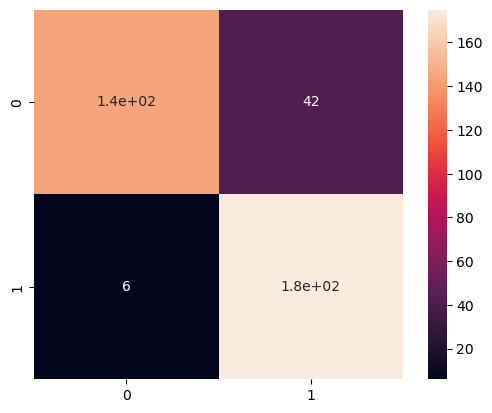

In [61]:
gbc = GradientBoostingClassifier(n_estimators=150,criterion='squared_error',loss='deviance')
classification_model(gbc) 

In [62]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc_para = {'n_estimators':range(50,250,50)}
gsCV_bc = GridSearchCV(bc,bc_para,scoring='accuracy')
gsCV_bc.fit(x_train,y_train)
gsCV_bc.best_params_

{'n_estimators': 50}

Model: BaggingClassifier
Accuracy Score: 89.37
f1 Score: 89.37
CV Score: 88.55
ROC_AUC Score: 89.41
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       186
           1       0.87      0.92      0.90       181

    accuracy                           0.89       367
   macro avg       0.89      0.89      0.89       367
weighted avg       0.90      0.89      0.89       367



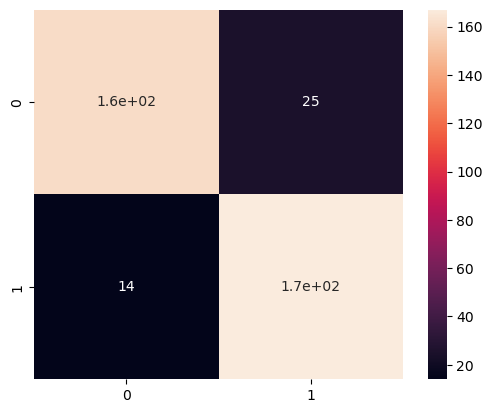

In [63]:
bc = BaggingClassifier(n_estimators=200)
classification_model(bc)

In [64]:
classifier_models = pd.DataFrame({'Model Name':Model,'Accuracy Score':score,'F1 Score':f1,'CV Score':cross,
                                  'ROC_AUC Score':roc_auc})
classifier_models.sort_values(by='ROC_AUC Score',ascending=False)

,Model Name,Accuracy Score,F1 Score,CV Score,ROC_AUC Score
5,BaggingClassifier,89.37,89.37,88.55,89.41
2,RandomForestClassifier,89.10,89.10,87.53,89.14
4,GradientBoostingClassifier,86.92,86.92,87.05,87.05
1,DecisionTreeClassifier,85.83,85.83,84.05,85.83
0,LogisticRegression,81.47,81.47,80.10,81.51
3,AdaBoostClassifier,80.93,80.93,86.44,81.06


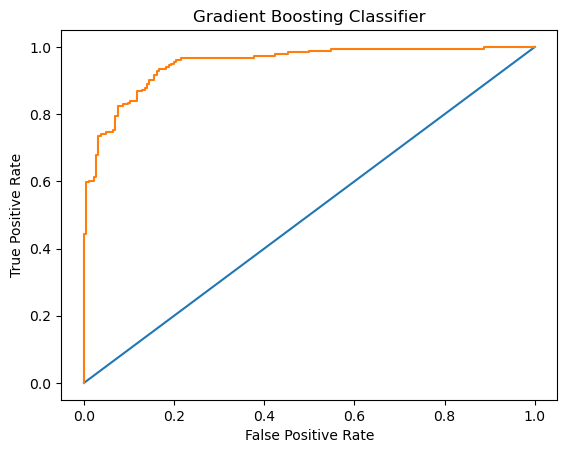

In [65]:
# Plotting ROC Curve for the model
from sklearn.metrics import roc_curve
y_pred_prob = gbc.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

<Axes: >

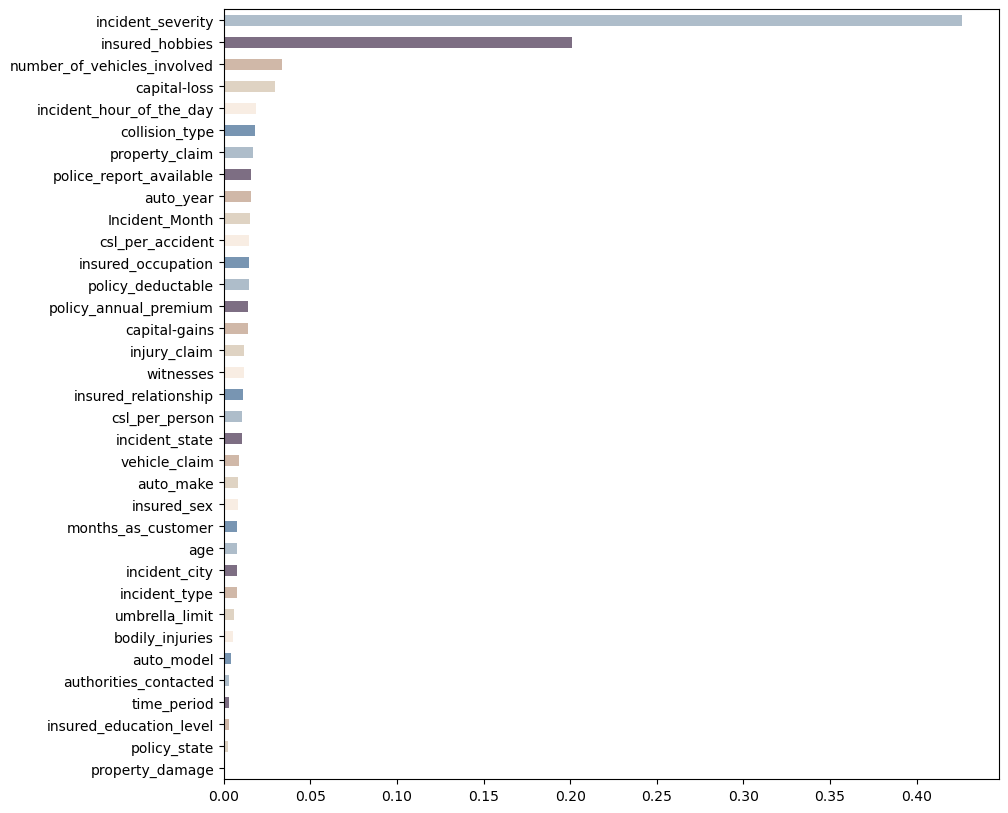

In [66]:
# Feature importance of the classifier
pd.Series(gbc.feature_importances_, index = x.columns).sort_values(ascending=True).plot(kind='barh', figsize=(10,10),color=(['#F8EDE3','#DFD3C3','#D0B8A8','#7D6E83','#AEBDCA','#7895B2']))